In [1]:
# pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
import yfinance as yf

In [1]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-15,4.845115,4.959524,4.791758,4.804662,1035177611
2005-02-16,4.924035,4.946867,4.822036,4.831963,663770685
2005-02-17,4.911378,4.957290,4.884327,4.909640,418137429
2005-02-18,4.912619,4.934706,4.880604,4.926517,340708289
2005-02-22,4.749320,4.936195,4.724999,4.876634,541369609


In [7]:
google_data.shape

(5033, 5)

In [8]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,49.691848,50.194177,49.174151,49.668700,1.059832e+08
std,47.686171,48.182865,47.184930,47.650654,1.369700e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.420297,13.544136,13.285041,13.421289,2.631600e+07
50%,28.386789,28.664180,28.128179,28.413119,4.944062e+07
75%,66.833855,67.407794,66.182198,66.832859,1.296160e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-02-15 to 2025-02-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [10]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

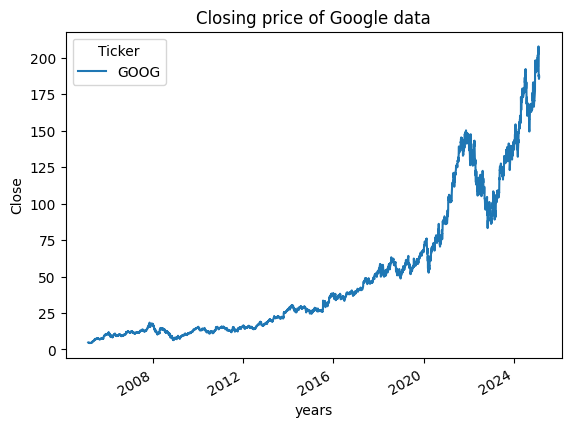

In [13]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [14]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [15]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

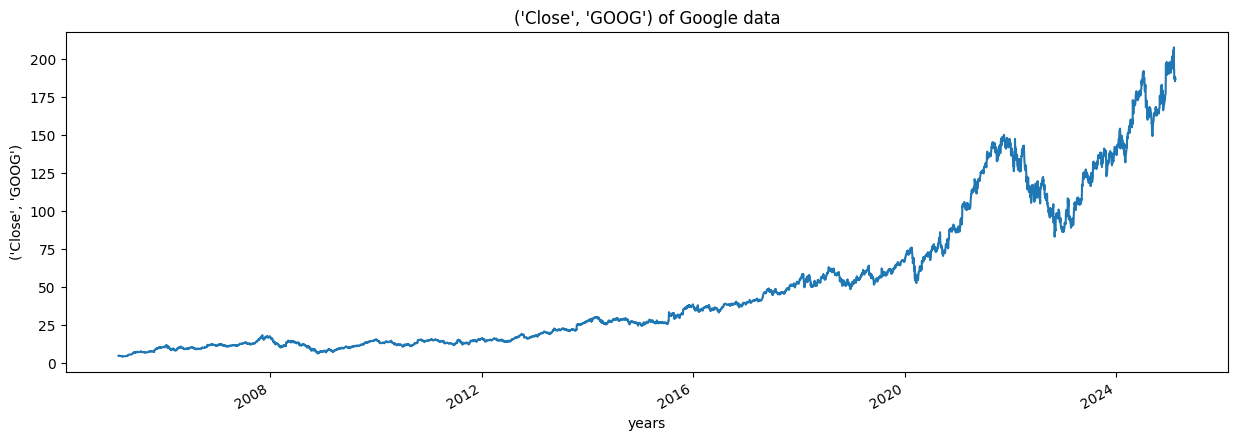

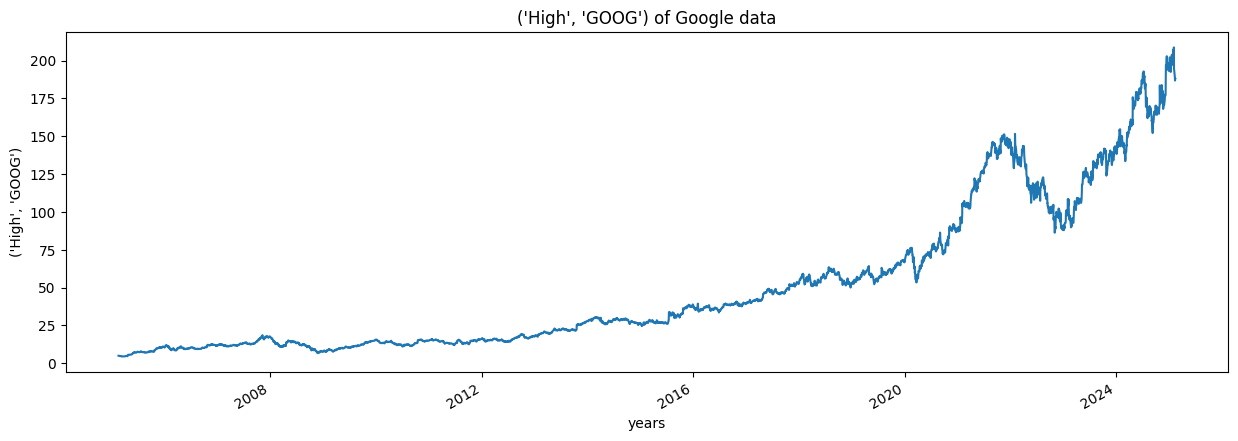

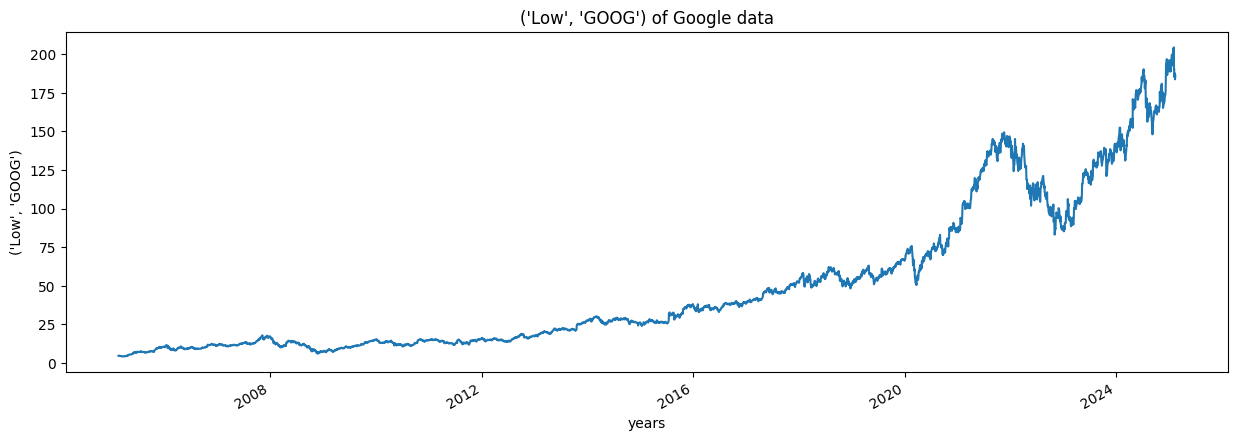

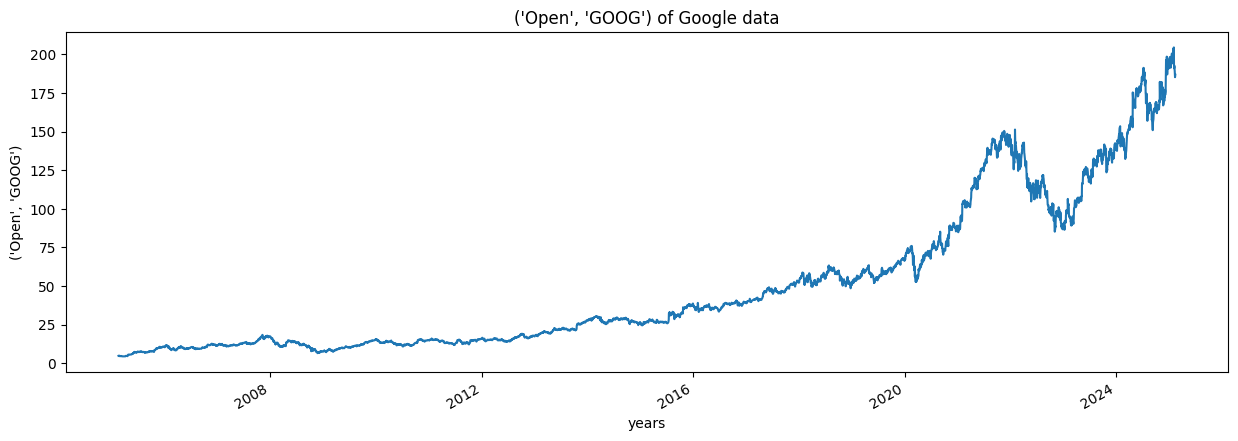

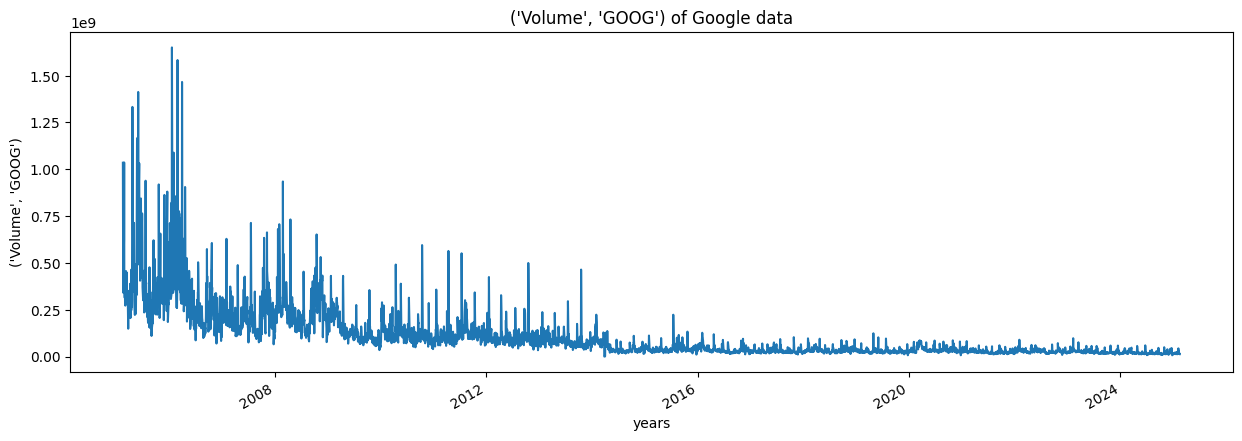

In [16]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 222
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [22]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [23]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-02-06         NaN
2006-02-07         NaN
2006-02-08         NaN
2006-02-09         NaN
2006-02-10    7.555209
Name: MA_for_250_days, dtype: float64

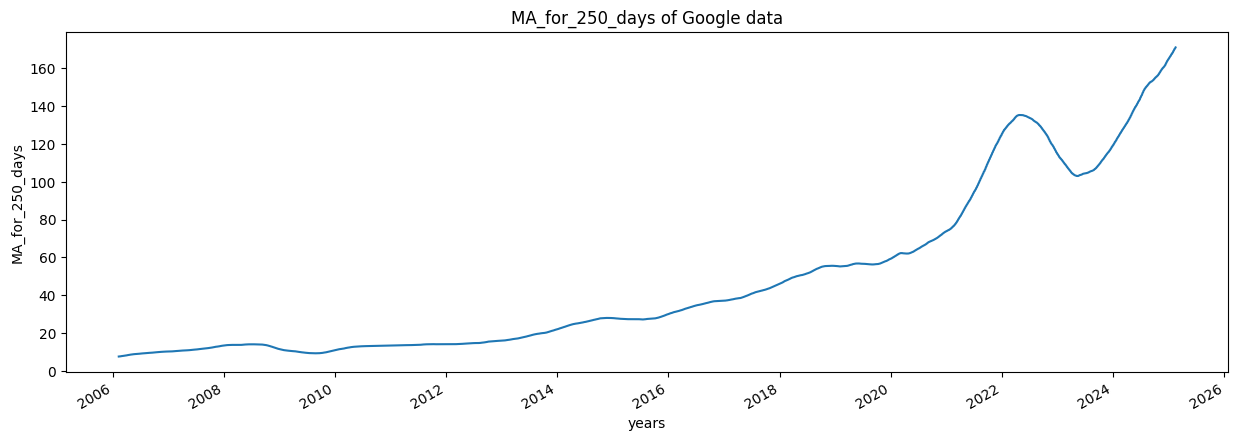

In [24]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

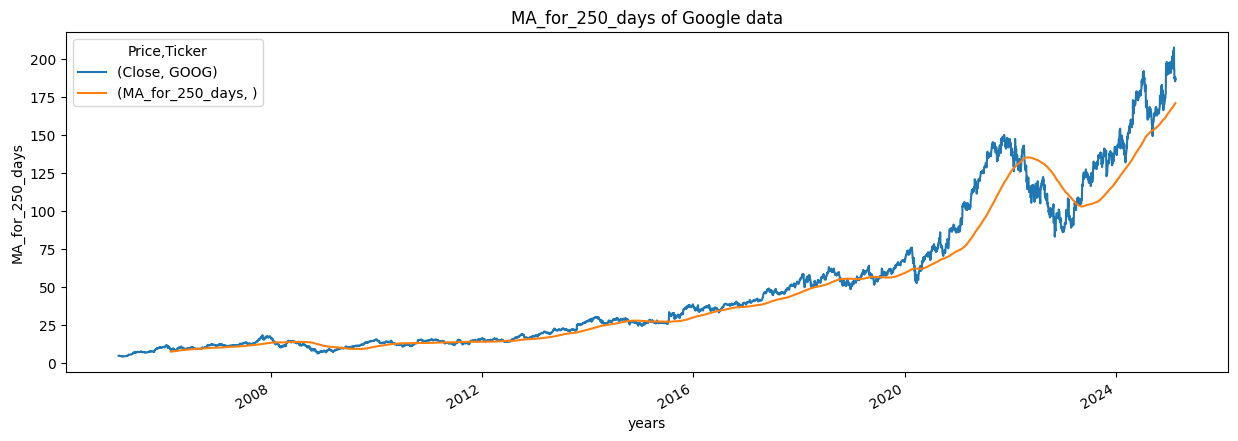

In [25]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

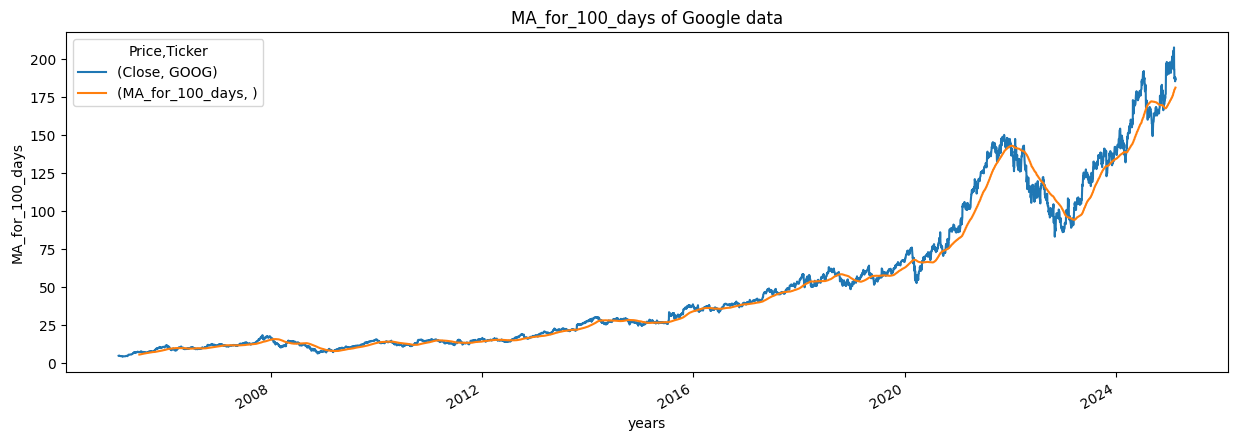

In [27]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

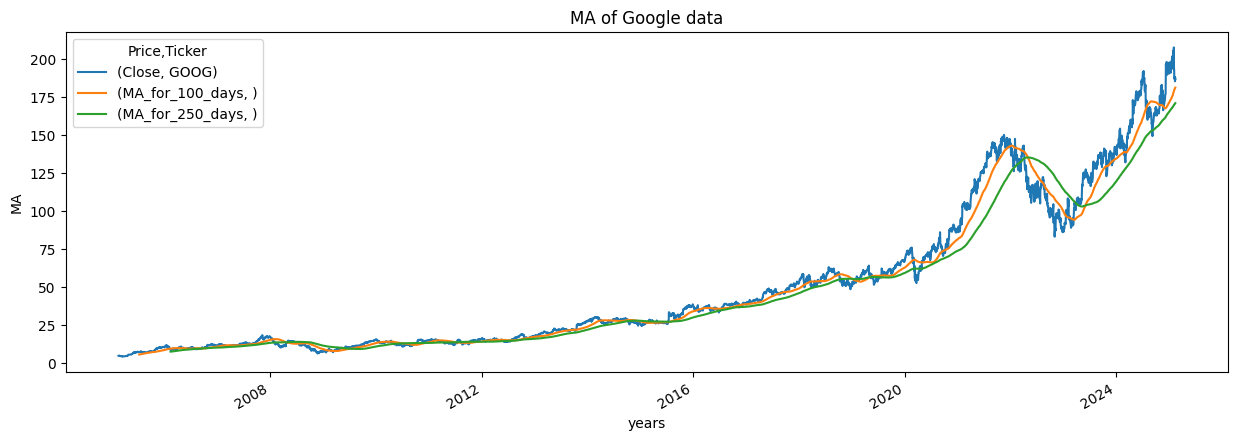

In [28]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [29]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-15,4.845115,NaN
2005-02-16,4.924035,0.016289
2005-02-17,4.911378,-0.002570
2005-02-18,4.912619,0.000253
2005-02-22,4.749320,-0.033241


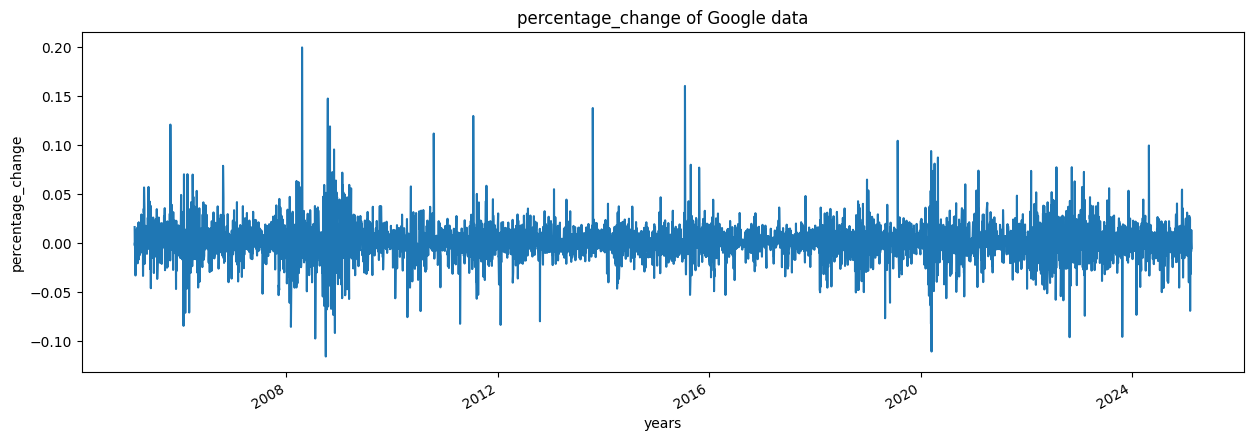

In [30]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [31]:
Adj_close_price = google_data[['Close']]

In [32]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([207.71000671]), array([4.34280968]))

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00246994],
       [0.00285801],
       [0.00279577],
       ...,
       [0.89044441],
       [0.90249164],
       [0.89752521]])

In [34]:
len(scaled_data)

5033

In [35]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [36]:
x_data[0],y_data[0]

(array([[2.46994126e-03],
        [2.85800957e-03],
        [2.79577392e-03],
        [2.80187252e-03],
        [1.99889600e-03],
        [2.31374369e-03],
        [1.69625486e-03],
        [1.32771565e-03],
        [1.58642394e-03],
        [1.35090249e-03],
        [1.24351241e-03],
        [1.46683434e-03],
        [1.33137574e-03],
        [1.68648914e-03],
        [1.24595325e-03],
        [7.76127240e-04],
        [6.08942363e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44398621e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18775627e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84669020e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.25693822e-03],
        [1.65720606e-03],
        [1.73652526e-03],
        [2.29055217e-03],
        [2.08187764e-03],
        [2.22587802e-03],
        [2.3

In [39]:

int(len(x_data)*0.7)

3453

In [40]:
4908-100-int(len(x_data)*0.7)

1355

In [41]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 [==============================] - 78s 22ms/step - loss: 1.2521e-04
Epoch 2/2
3453/3453 [==============================] - 76s 22ms/step - loss: 5.7779e-05


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [48]:
predictions = model.predict(x_test)

47/47 [==============================] - 2s 30ms/step


In [49]:
predictions

array([[0.2682669 ],
       [0.2680347 ],
       [0.2703704 ],
       ...,
       [0.87990236],
       [0.87585497],
       [0.8789524 ]], dtype=float32)

In [50]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.899494],
       [ 58.852276],
       [ 59.32728 ],
       ...,
       [183.28609 ],
       [182.46297 ],
       [183.09288 ]], dtype=float32)

In [51]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.45546341],
       [ 59.5076828 ],
       [ 59.80960083],
       ...,
       [185.42999268],
       [187.88000488],
       [186.86999512]])

In [52]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [53]:
rmse

3.077143432483402

In [54]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-29,58.455463,58.899494
2019-04-01,59.507683,58.852276
2019-04-02,59.809601,59.327278
2019-04-03,60.080128,59.823715
2019-04-04,60.532501,60.212559


<Figure size 640x480 with 0 Axes>

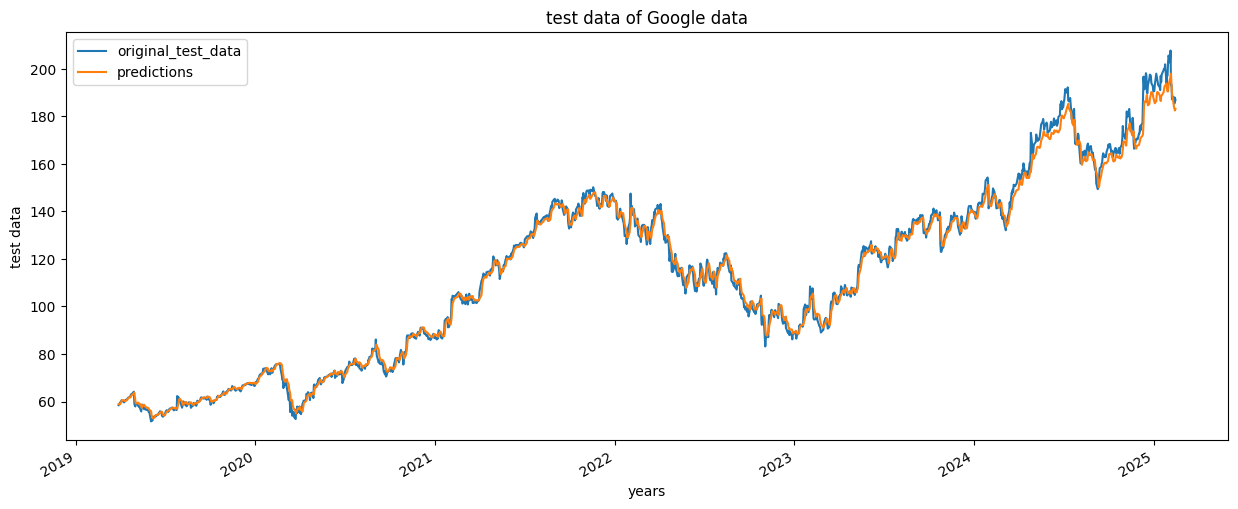

In [55]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

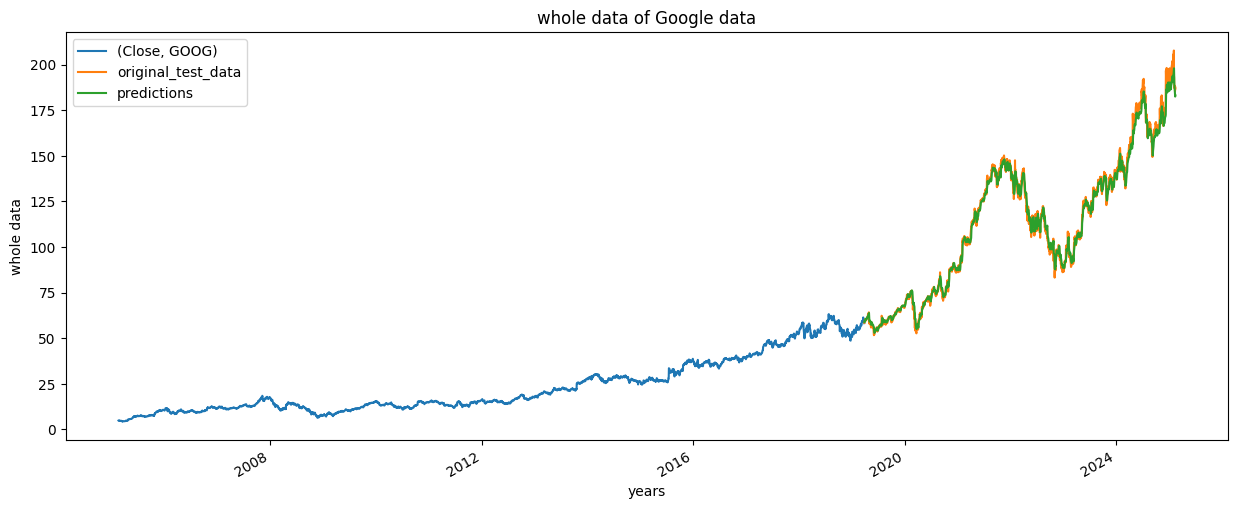

In [56]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [57]:
model.save("Latest_stock_price_model.keras")